## PCA Implementation

## Load the Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn import datasets

In [16]:
## load dataset

df = pd.read_csv("/Users/jassi/Datasets/wine.csv",header=None)
                   

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


## Split the dataset into features and target variables

In [19]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


## Data preprocessing

In [21]:
## StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
# Fit PCA to the scaled data
pca = PCA()
pca.fit(X_scaled)


PCA()

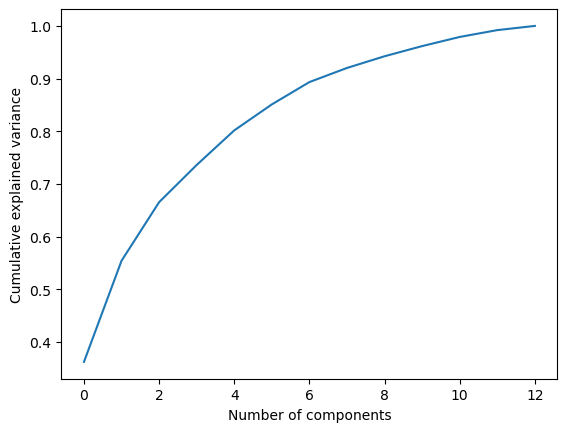

In [23]:
# Plot the cumulative sum of the explained variance ratio

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


## Scatter plot

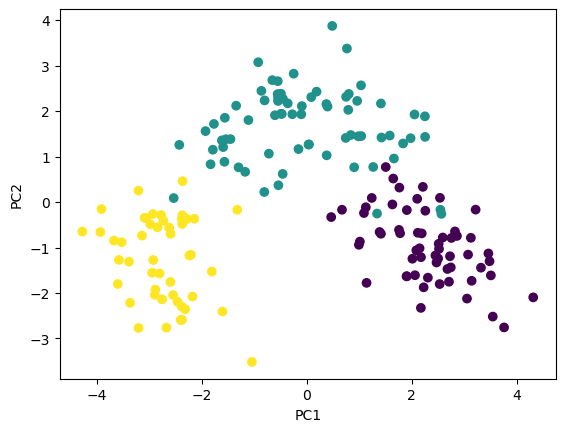

In [24]:
# Transform the data to the selected number of components
X_pca = pca.transform(X_scaled)[:, :2]

# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## Clustering using KMeans

In [26]:
from sklearn.cluster import KMeans

# Fit K-Means to the transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Predict the cluster labels for the transformed data
y_pred = kmeans.predict(X_pca)
print(y_pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Interpretation

Interpret the results of PCA and clustering analysis. Based on the scatter plot, it looks like there is some separation between the three classes of wines. The clustering analysis on the transformed data confirms this, with the K-Means algorithm grouping the data into three distinct clusters. However, it's important to note that this analysis is exploratory in nature and further investigation may be needed to fully understand the relationships between the variables in the dataset.